<h1><strong>MEDICAL Herbs</strong></h1>



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

> *Loading the dataset*

In [ ]:
data = pd.read_csv('/content/herbs.csv')
data.head(10)

,Status,Latin name of herbal substance,Botanical name of plant,English common name of herbal substance,Combination,Use,Outcome,Date added to the inventory,Date added to the priority list,First published,Revision date,URL
0,F: Assessment finalised,Ginseng radix,Panax ginseng C.A.Mey.,Ginseng,no,Fatigue and weakness,European Union herbal monograph,07-09-2007,07-09-2007,31-12-2009,25-10-2023,https://www.ema.europa.eu/en/medicines/herbal/...
1,F: Assessment finalised,Pelargonii radix,Pelargonium sidoides DC; Pelargonium reniforme...,Pelargonium root,no,Cough and cold,European Union herbal monograph,16-07-2009,16-07-2009,31-12-2009,16-10-2023,https://www.ema.europa.eu/en/medicines/herbal/...
2,D: Draft under discussion,Pruni cerasi stipites,Prunus cerasus L./Prunus avium L.,Cherry stalks,no,Urinary tract and genital disorders,NaN,23-11-2022,25-01-2023,09-02-2023,10-10-2023,https://www.ema.europa.eu/en/medicines/herbal/...
3,D: Draft under discussion,Combination: Species pectoralis,NaN,Herbal tea combinations for use in cough and cold,no,Cough and cold,NaN,23-11-2022,25-01-2023,09-02-2023,10-10-2023,https://www.ema.europa.eu/en/medicines/herbal/...
4,D: Draft under discussion,Cannabis flos,Cannabis sativa L.,Cannabis flowering tops,no,NaN,NaN,01-03-2020,25-01-2023,09-02-2023,10-10-2023,https://www.ema.europa.eu/en/medicines/herbal/...
5,F: Assessment finalised,Rhodiolae roseae rhizoma et radix,Rhodiola rosea L.,Arctic root,no,"Fatigue and weakness, Mental stress and mood d...",European Union herbal monograph,16-07-2009,16-07-2009,31-12-2009,02-08-2023,https://www.ema.europa.eu/en/medicines/herbal/...
6,F: Assessment finalised,Origani majoranae herba,Origanum majorana L.,Majoram,no,"Skin disorders and minor wounds, Gastrointesti...",European Union herbal monograph,28-01-2014,28-01-2014,17-02-2014,02-08-2023,https://www.ema.europa.eu/en/medicines/herbal/...
7,F: Assessment finalised,Melaleucae aetheroleum,Melaleuca alternifolia (Maiden and Betche) Cheel,Tea-tree oil,no,"Mouth and throat disorders, Skin disorders and...","European Union herbal monograph, European Unio...",31-10-2007,06-11-2008,31-12-2009,02-08-2023,https://www.ema.europa.eu/en/medicines/herbal/...
8,F: Assessment finalised,Capsici fructus,Capsicum annuum L. var. minimum (Miller) Heiser,Capsicum,no,Pain and inflammation,European Union herbal monograph,31-03-2011,31-03-2011,14-04-2011,31-07-2023,https://www.ema.europa.eu/en/medicines/herbal/...
9,F: Assessment finalised,Rubi idaei folium,Rubus idaeus L.,Raspberry leaf,no,"Mouth and throat disorders, Pain and inflammat...",European Union herbal monograph,13-09-2011,13-09-2011,26-09-2011,27-06-2023,https://www.ema.europa.eu/en/medicines/herbal/...


## Exploratory Data Analysis

In [ ]:
data.shape

(211, 12)

From above, it is clear that the dataset contains `31` features with `395` records.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Status                                   201 non-null    object
 1   Latin name of herbal substance           203 non-null    object
 2   Botanical name of plant                  198 non-null    object
 3   English common name of herbal substance  202 non-null    object
 4   Combination                              203 non-null    object
 5   Use                                      178 non-null    object
 6   Outcome                                  190 non-null    object
 7   Date added to the inventory              203 non-null    object
 8   Date added to the priority list          203 non-null    object
 9   First published                          203 non-null    object
 10  Revision date                            200 non-null    objec

*From the above output we concluded that there are no null values but there are some features that has non int values. These values have to converted to numerical categorical data.*

In [ ]:
for i in data.columns:
  print(i,set(data[i].values))

Status {nan, 'C: ongoing call for scientific data', 'D: Draft under discussion', 'F: Assessment finalised'}
Latin name of herbal substance {'Sennae fructus', 'Absinthii herba', 'Avenae herba', 'Visci albi herba', 'Levistici radix', 'Uvae ursi folium', 'Pilosellae herba cum radice', 'Taraxaci radix cum herba', 'Ricini oleum', 'Melissae folium', 'Foeniculi dulcis fructus', 'Hippocastani semen', 'Cimicifugae rhizoma', 'Caryophylli floris aetheroleum', 'Uncariae tomentosae cortex', 'Euphrasiae herba', 'Cisti cretici herba', 'Paeoniae radix alba', 'Carvi aetheroleum', 'Arctii radix', 'Equiseti herba', 'Allii sativi bulbus', 'Lavandulae flos', 'Balsamum peruvianum', 'Oenotherae oleum', 'Combination: Valerianae radix and Lupuli flos', 'Maydis stigma', 'Citri bergamiae aetheroleum', 'Cinnamomi corticis aetheroleum', 'Symphyti radix', 'Plantaginis ovatae semen', 'Grindeliae herba', 'Lichen islandicus', 'Tiliae flos', 'Valerianae radix', 'Thymi aetheroleum', 'Hamamelidis folium et cortex aut ram

> *Convertion of values of Object type to Integer type:*




The above code helps us to have a glance at the unique values present in each feature of the dataset.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# objCols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'dropout']
# data[objCols] = data[objCols].apply(le.fit_transform)

# objCols=[]
# for name in feature_names:
#   if data[name].dtype =='object':
#     objCols.append(name)
# data[objCols] = data[objCols].apply(le.fit_transform)


feature_names = data.columns.values

for name in feature_names:
  if data[name].dtype =='object':
    data[name] = le.fit_transform(data[name])
data.head()

,Status,Latin name of herbal substance,Botanical name of plant,English common name of herbal substance,Combination,Use,Outcome,Date added to the inventory,Date added to the priority list,First published,Revision date,URL
0,2,77,105,69,0,11,0,8,11,40,95,70
1,2,131,108,139,0,5,0,25,33,40,65,125
2,1,144,123,33,0,49,4,31,44,8,35,138
3,1,45,172,82,0,5,4,31,44,8,35,171
4,1,24,23,24,0,53,4,0,44,8,35,24


*Now we find that the data set is transformed into a dataset with only integer values.*

*As we know that the model can't be trained on the categorical data, so we converted the values of object type into integer type.*

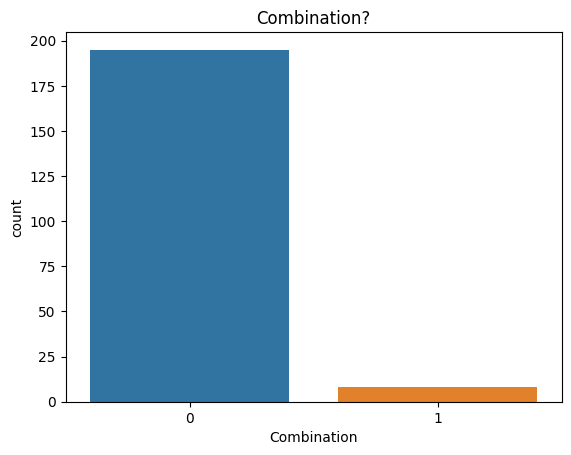

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Combination', data=data)
plt.title('Combination?')
plt.show()


In [ ]:
data['Combination'].value_counts(normalize=True)

0    0.960591
1    0.039409
Name: Combination, dtype: float64

*For optimal/high accuracy, a good dataset must not contain features with high correaltion among them.
The `.corr()` method of pandas library helps us to find the co-relation among the features.*

In [ ]:
corMatrix = data.corr().abs()
corMatrix

,Status,Latin name of herbal substance,Botanical name of plant,English common name of herbal substance,Combination,Use,Outcome,Date added to the inventory,Date added to the priority list,First published,Revision date,URL
Status,1.000000,0.034727,0.049288,0.066003,0.066640,0.050201,0.236533,0.072958,0.123082,0.279851,0.163342,0.023033
Latin name of herbal substance,0.034727,1.000000,0.665891,0.302819,0.176164,0.005811,0.051390,0.008023,0.008791,0.101970,0.002742,0.908174
Botanical name of plant,0.049288,0.665891,1.000000,0.105507,0.025783,0.006888,0.049769,0.009063,0.018910,0.079271,0.071107,0.697168
English common name of herbal substance,0.066003,0.302819,0.105507,1.000000,0.022775,0.065916,0.019790,0.040490,0.086034,0.087307,0.058916,0.296455
Combination,0.066640,0.176164,0.025783,0.022775,1.000000,0.051388,0.054300,0.009412,0.040647,0.197423,0.014513,0.180895
Use,0.050201,0.005811,0.006888,0.065916,0.051388,1.000000,0.415106,0.008224,0.057496,0.238233,0.094489,0.003357
Outcome,0.236533,0.051390,0.049769,0.019790,0.054300,0.415106,1.000000,0.019756,0.135002,0.368172,0.014380,0.038115
Date added to the inventory,0.072958,0.008023,0.009063,0.040490,0.009412,0.008224,0.019756,1.000000,0.557682,0.151779,0.037038,0.002640
Date added to the priority list,0.123082,0.008791,0.018910,0.086034,0.040647,0.057496,0.135002,0.557682,1.000000,0.314782,0.067342,0.019319
First published,0.279851,0.101970,0.079271,0.087307,0.197423,0.238233,0.368172,0.151779,0.314782,1.000000,0.099699,0.012438


*Since the upper triangle and lower triangle matrices are same, we shall consider any one of them.*

In [ ]:
    upper_matrix = corMatrix.where(np.triu(np.ones(corMatrix.shape),k=1).astype(np.bool_))
    upper_matrix.head()

,Status,Latin name of herbal substance,Botanical name of plant,English common name of herbal substance,Combination,Use,Outcome,Date added to the inventory,Date added to the priority list,First published,Revision date,URL
Status,NaN,0.034727,0.049288,0.066003,0.066640,0.050201,0.236533,0.072958,0.123082,0.279851,0.163342,0.023033
Latin name of herbal substance,NaN,NaN,0.665891,0.302819,0.176164,0.005811,0.051390,0.008023,0.008791,0.101970,0.002742,0.908174
Botanical name of plant,NaN,NaN,NaN,0.105507,0.025783,0.006888,0.049769,0.009063,0.018910,0.079271,0.071107,0.697168
English common name of herbal substance,NaN,NaN,NaN,NaN,0.022775,0.065916,0.019790,0.040490,0.086034,0.087307,0.058916,0.296455
Combination,NaN,NaN,NaN,NaN,NaN,0.051388,0.054300,0.009412,0.040647,0.197423,0.014513,0.180895


In [ ]:
drop_columns = [col for col in upper_matrix if any(upper_matrix[col]>0.65)]
print(drop_columns)

['Botanical name of plant', 'URL']


*The features of the dataset are not highly co-related. Hence, no features are required to be removed.*

In [ ]:
X = data.drop('Combination', axis=1)
y= data.Combination

In [ ]:
data.corr()

,Status,Latin name of herbal substance,Botanical name of plant,English common name of herbal substance,Combination,Use,Outcome,Date added to the inventory,Date added to the priority list,First published,Revision date,URL
Status,1.000000,0.034727,0.049288,-0.066003,-0.066640,-0.050201,-0.236533,-0.072958,-0.123082,0.279851,-0.163342,0.023033
Latin name of herbal substance,0.034727,1.000000,0.665891,0.302819,-0.176164,0.005811,-0.051390,-0.008023,-0.008791,0.101970,-0.002742,0.908174
Botanical name of plant,0.049288,0.665891,1.000000,0.105507,0.025783,-0.006888,0.049769,-0.009063,0.018910,-0.079271,0.071107,0.697168
English common name of herbal substance,-0.066003,0.302819,0.105507,1.000000,0.022775,0.065916,0.019790,0.040490,-0.086034,0.087307,0.058916,0.296455
Combination,-0.066640,-0.176164,0.025783,0.022775,1.000000,0.051388,0.054300,-0.009412,0.040647,-0.197423,-0.014513,0.180895
Use,-0.050201,0.005811,-0.006888,0.065916,0.051388,1.000000,0.415106,0.008224,0.057496,-0.238233,0.094489,0.003357
Outcome,-0.236533,-0.051390,0.049769,0.019790,0.054300,0.415106,1.000000,-0.019756,0.135002,-0.368172,-0.014380,-0.038115
Date added to the inventory,-0.072958,-0.008023,-0.009063,0.040490,-0.009412,0.008224,-0.019756,1.000000,0.557682,-0.151779,0.037038,-0.002640
Date added to the priority list,-0.123082,-0.008791,0.018910,-0.086034,0.040647,0.057496,0.135002,0.557682,1.000000,-0.314782,0.067342,0.019319
First published,0.279851,0.101970,-0.079271,0.087307,-0.197423,-0.238233,-0.368172,-0.151779,-0.314782,1.000000,-0.099699,0.012438


##Data Visualization

*By using pandas, matplotlib and seaborn libraries we can visualize the data graphically and can understand more clearly.*

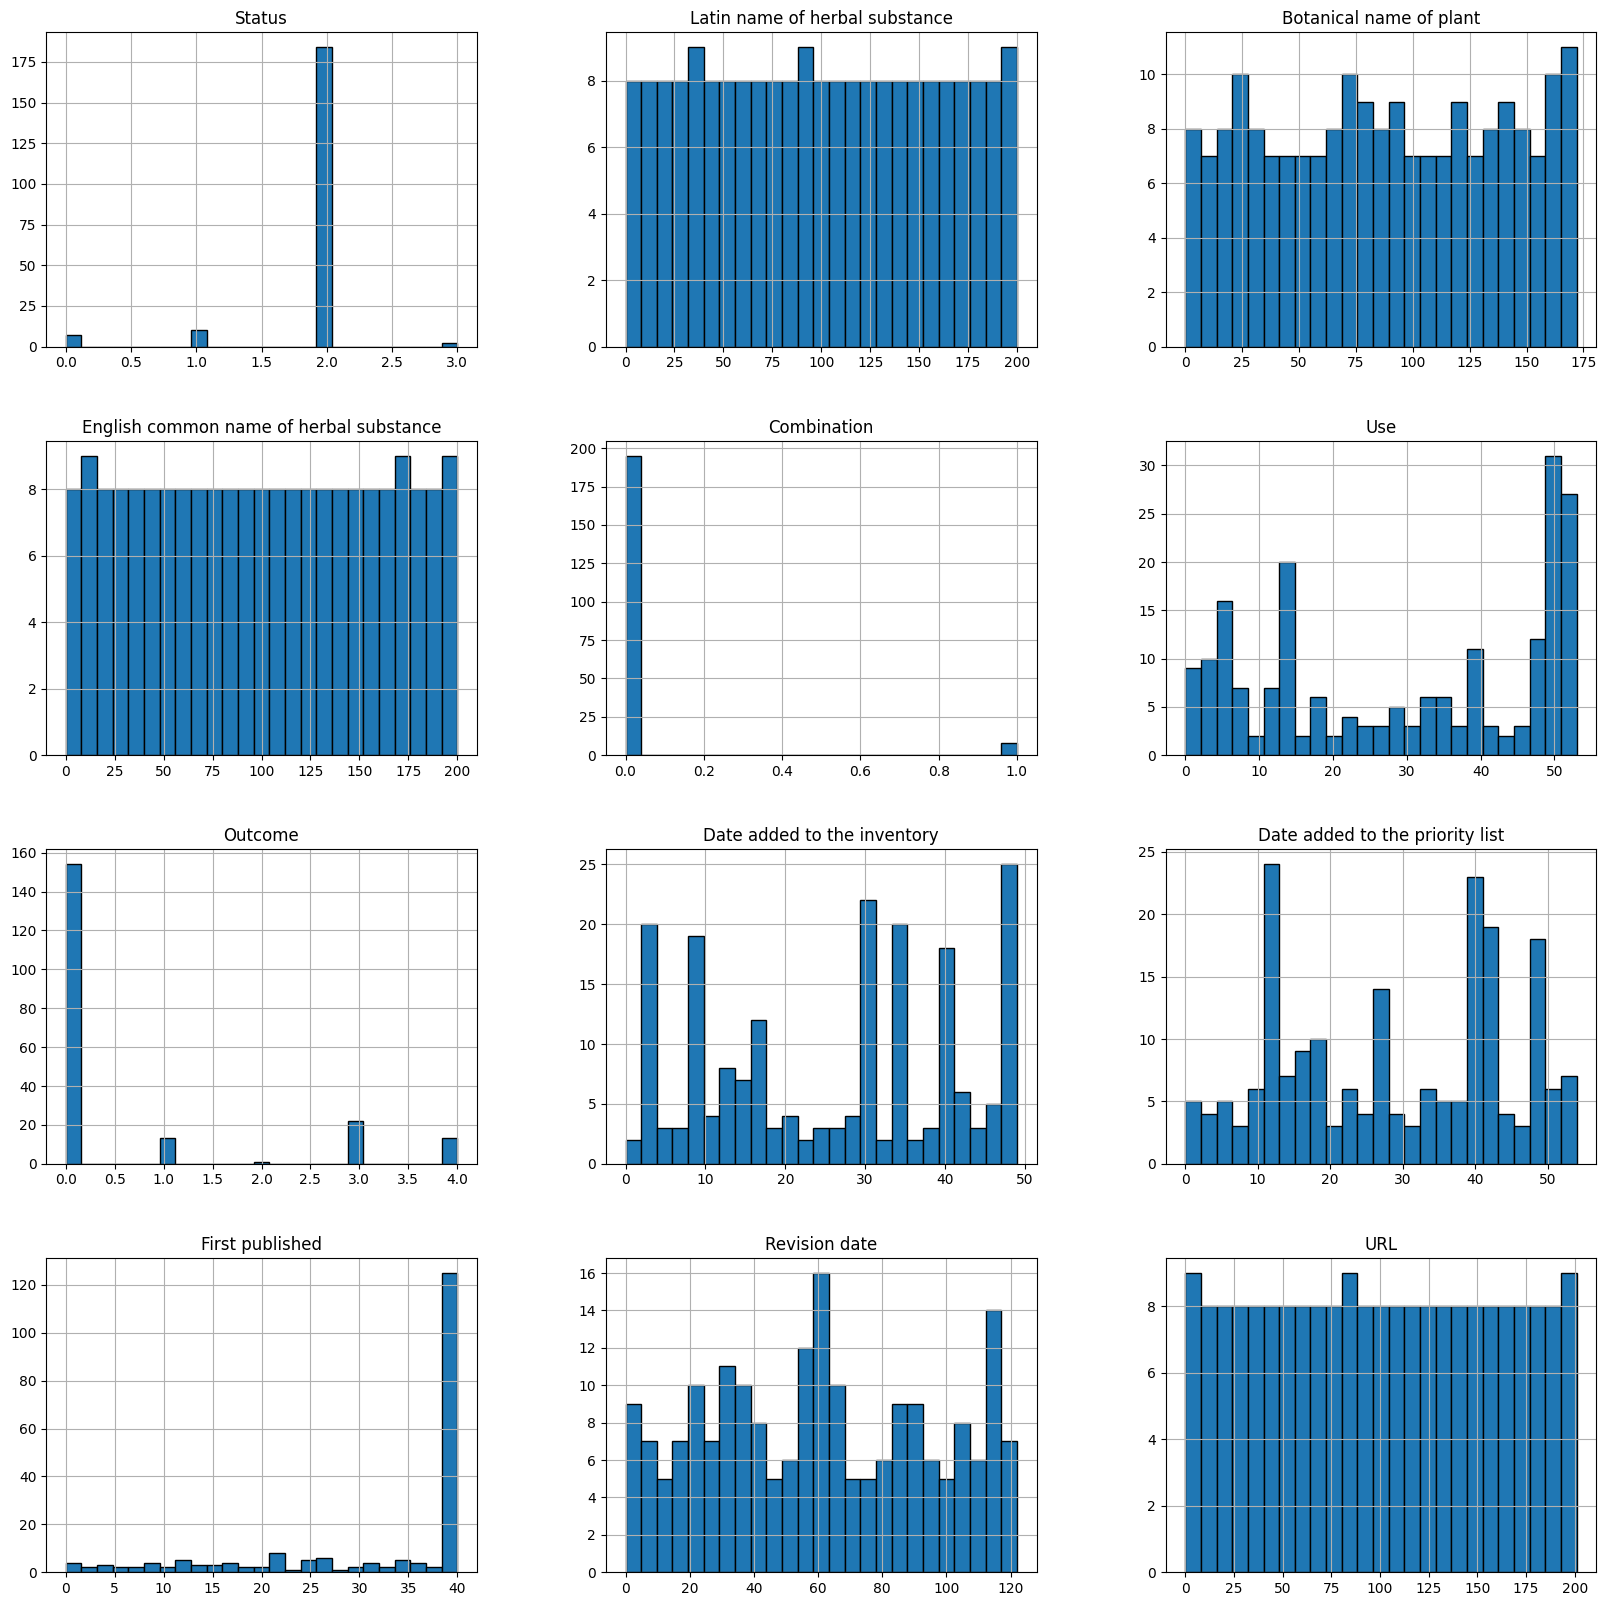

In [ ]:
data.hist(edgecolor='black',bins = 25, figsize= (20,20))
plt.show()

*The `hist()` method of pandas is used to represent the histograms of each feature specified in the data frame.*

<Axes: >

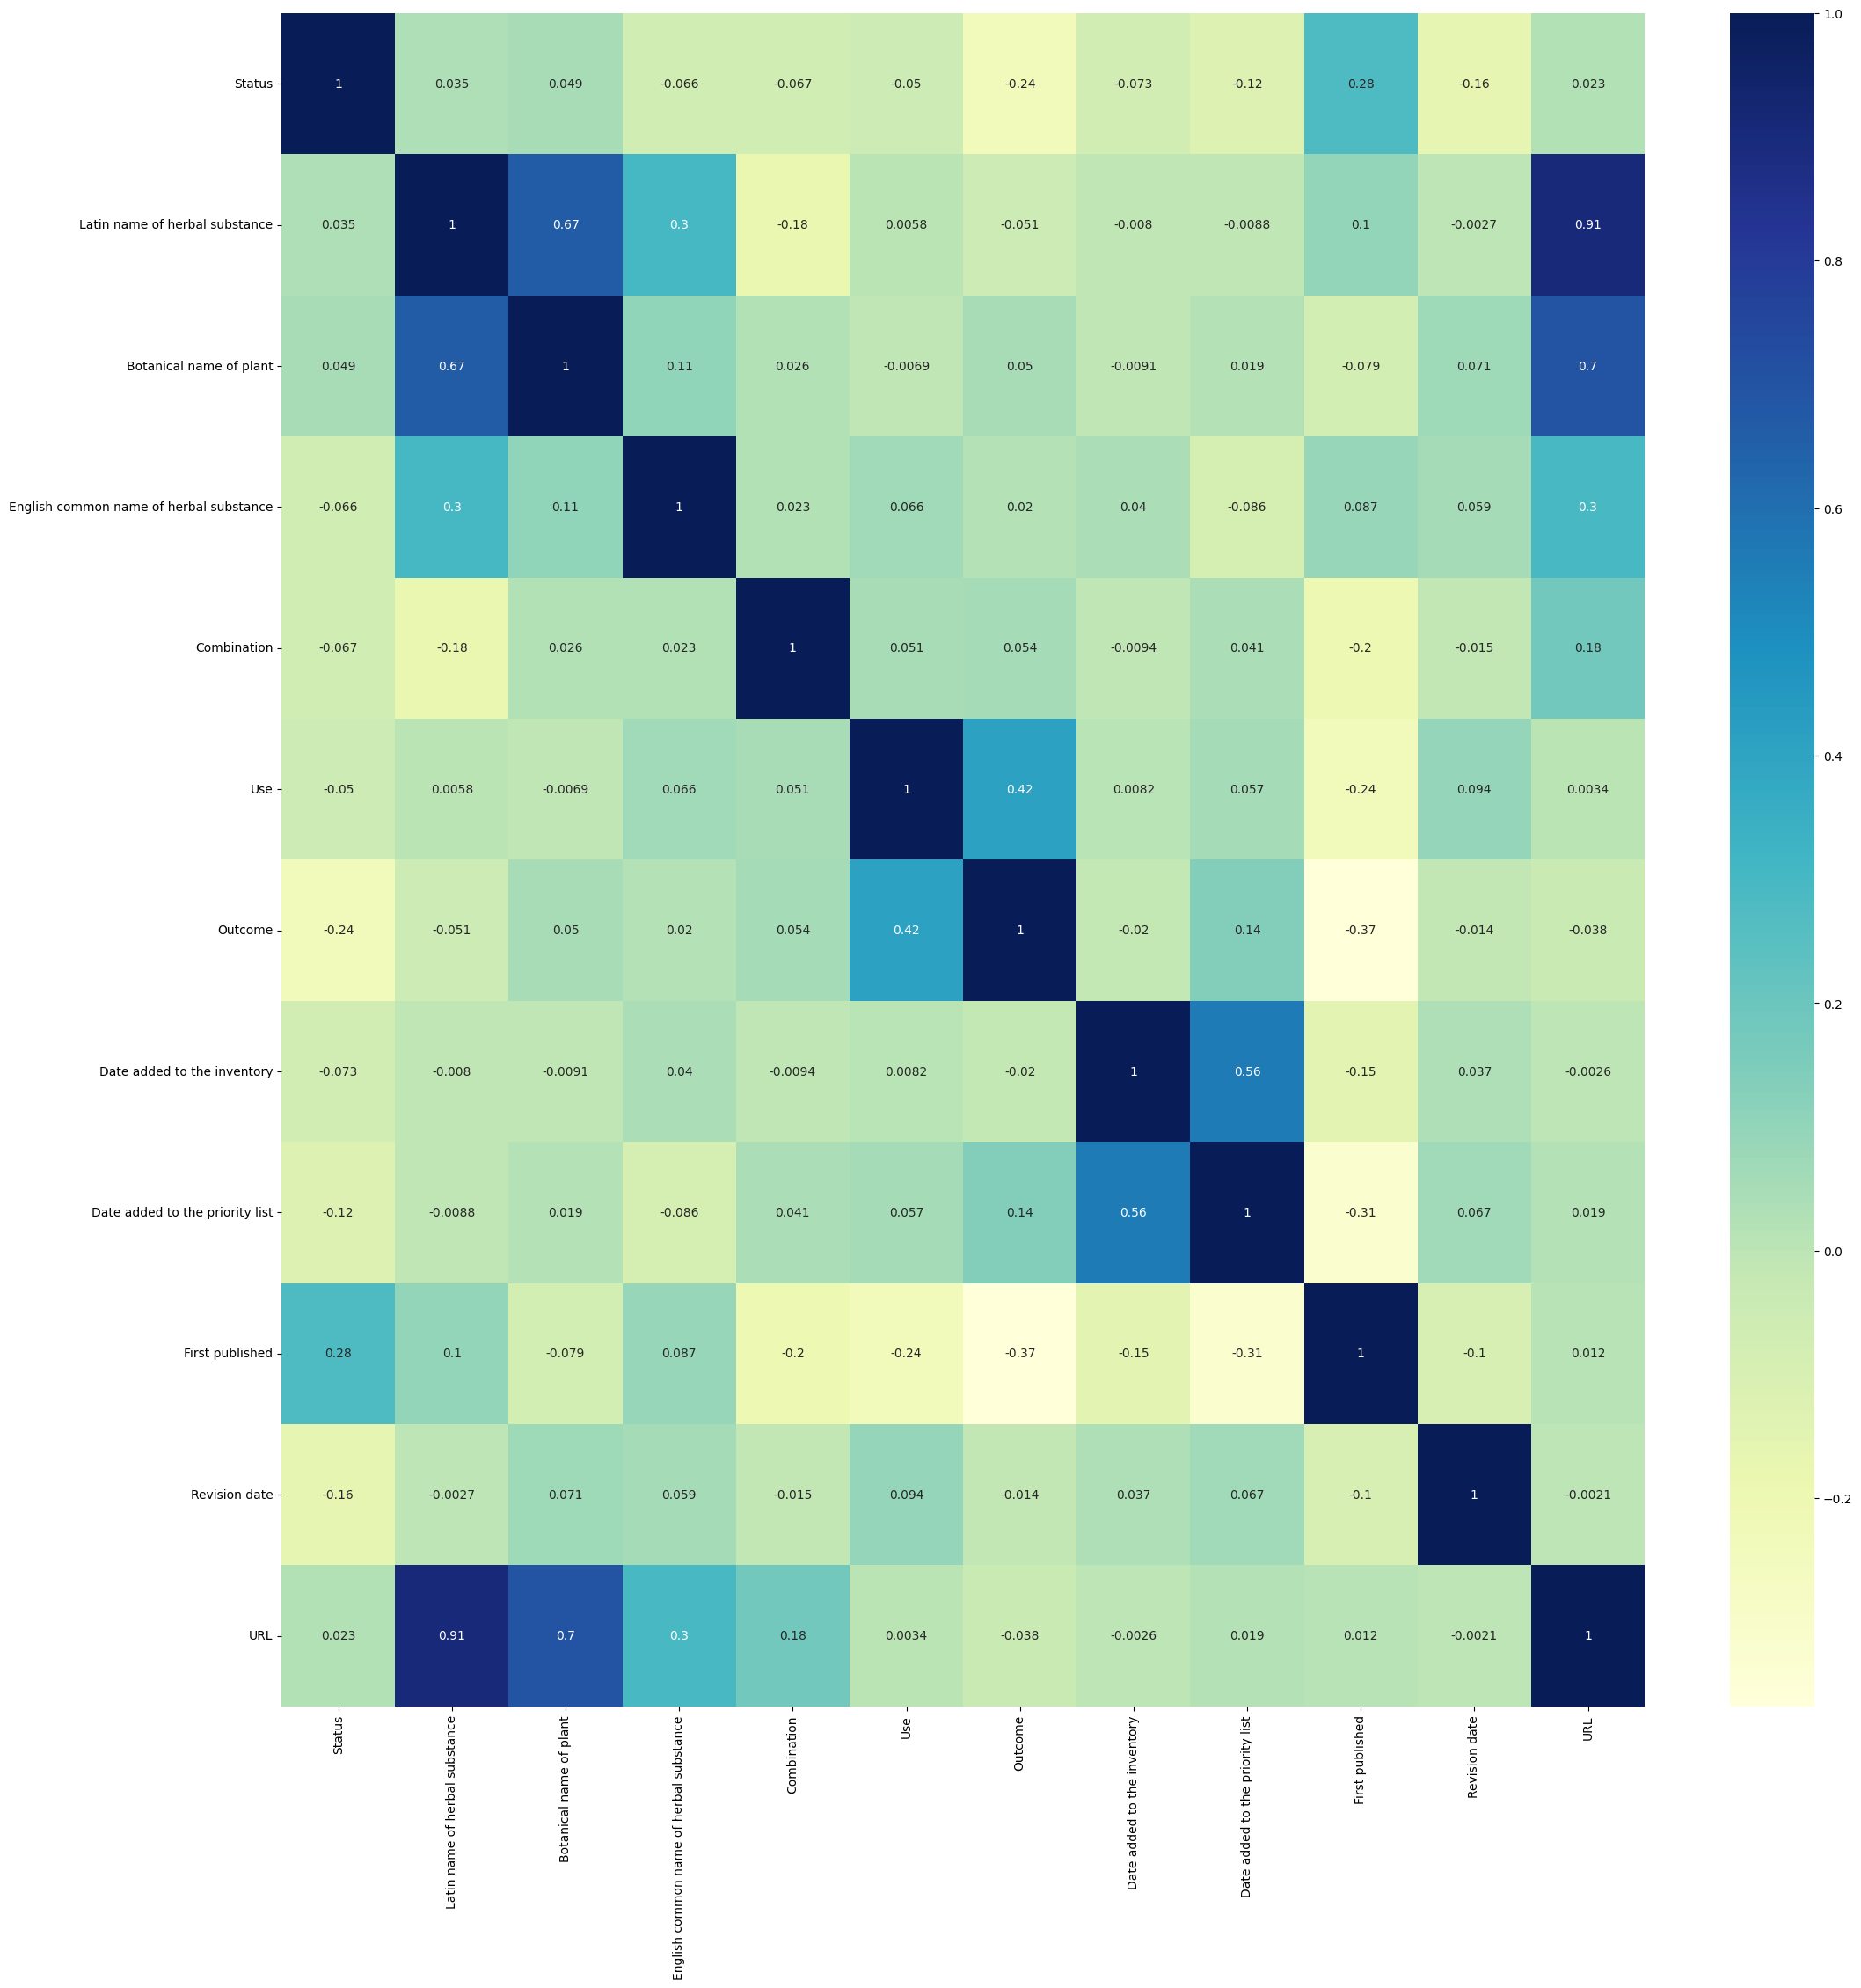

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

> *Feature Selection*

Reducing features from the dataset.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = SelectFromModel(DecisionTreeClassifier())
model.fit(X_train, y_train)

model.get_support()
selected_feat= X_train.columns[(model.get_support())]

print("The reduced features (The Features that have greater impact on target) :")
for feature in selected_feat:
  print(feature)
print("The number of Reduced features : {}".format(len(selected_feat)))

The reduced features (The Features that have greater impact on target) :
Botanical name of plant
Date added to the inventory
Revision date
The number of Reduced features : 3


In [ ]:
df = pd.DataFrame(data=data, columns=selected_feat)
df_target = data['Combination']
# df1 = pd.concat([df, df_target], ignore_index=True, sort=False)
df = df.join(df_target, lsuffix='_caller', rsuffix='_other')
df.head()

,Botanical name of plant,Date added to the inventory,Revision date,Combination
0,105,8,95,0
1,108,25,65,0
2,123,31,35,0
3,172,31,35,0
4,23,0,35,0


In [ ]:
X = df.drop('Combination',axis=1)
y = df.Combination

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# rus = RandomUnderSampler()
# X, y = rus.fit_resample(X, y)


ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)


# sampler = SMOTE()
# X, y = sampler.fit_resample(X, y)

# # data.isnull().sum()

# X = X_ros
# y = y_ros

> Splitting data for Training and Testing

In [ ]:
#splitting the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

> Training the models and Evaluating their performance

*Since the target feature is categorical, the Machine learning models that are used to train and predict on this dataset should be of type Classification.*

*The various metrics for evaluating Classification models are*




> Confusion matrix
 *   Accuracy
 *   Recall
 *   Precision
 *   F1_score

> Classification Report







In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [ ]:
scores_df=pd.DataFrame({'Model':[], 'F1_score':[], 'Accuracy':[]})

### Decision Tree

*`Decision Tree` is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.*

In [ ]:
#decision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini')
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

print(classification_report(y_test,y_pred))
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score :{}'.format(type(dt).__name__,f1_score(y_test, y_pred)))

scores_df = scores_df.append(pd.DataFrame({'Model':[type(dt).__name__],
                               'F1_score':[f1_score(y_test, y_pred)],
                               'Accuracy':[accuracy_score(y_test, y_pred)]
                               }), ignore_index=True)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.92      1.00      0.96        35

    accuracy                           0.96        78
   macro avg       0.96      0.97      0.96        78
weighted avg       0.96      0.96      0.96        78

DecisionTreeClassifier's F1_Score :0.958904109589041


The Accuracy of Decision Tree Classifier is 0.68 and F1_score is 0.77

### Support Vector Machine

*`SVM` algorithm creates the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.*

In [ ]:
# svm

from sklearn.svm import SVC

svm = SVC(C=0.001)
svm.fit(X_train,y_train)

y_pred = svm.predict(X_test)

print(classification_report(y_test,y_pred))
confusion_matrix(y_test, y_pred)
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score :{}'.format(type(svm).__name__,f1_score(y_test, y_pred)))

scores_df = scores_df.append(pd.DataFrame({'Model':[type(svm).__name__],
                               'F1_score':[f1_score(y_test, y_pred)],
                               'Accuracy':[accuracy_score(y_test, y_pred)]
                               }), ignore_index=True)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.45      1.00      0.62        35

    accuracy                           0.45        78
   macro avg       0.22      0.50      0.31        78
weighted avg       0.20      0.45      0.28        78

SVC's F1_Score :0.6194690265486726


The Accuracy of Support Vector Machine Classifier is 0.71 and F1_score is 0.83

### Random Forest Classifier

*`Random Forest` is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.*

In [ ]:
#random forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=13, criterion='gini',max_depth=10, max_features='auto')
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test,y_pred))
confusion_matrix(y_test, y_pred)
# print('{}\'s Accuracy :{}'.format(type(model).__name__,accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score :{}'.format(type(rf).__name__,f1_score(y_test, y_pred)))

scores_df = scores_df.append(pd.DataFrame({'Model':[type(rf).__name__],
                               'F1_score':[f1_score(y_test, y_pred)],
                               'Accuracy':[accuracy_score(y_test, y_pred)]
                               }), ignore_index=True)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.95      1.00      0.97        35

    accuracy                           0.97        78
   macro avg       0.97      0.98      0.97        78
weighted avg       0.98      0.97      0.97        78

RandomForestClassifier's F1_Score :0.9722222222222222


The Accuracy of Random Forest Classifier is 0.75 and F1_score is 0.83

*Here we are using `Yellowbrick` for visualization of model prediction*

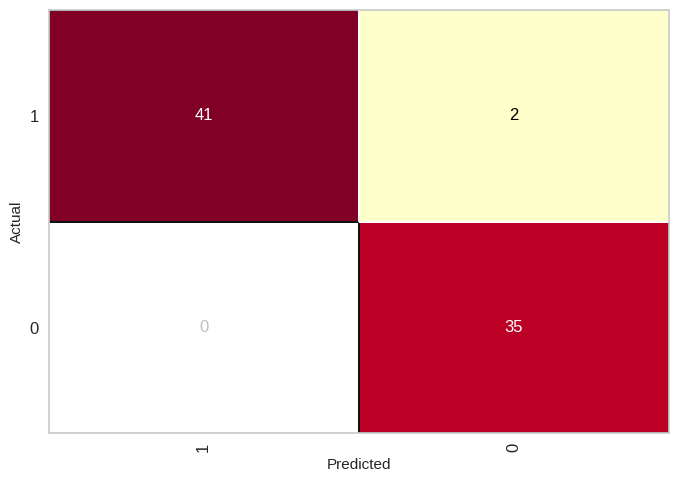

In [ ]:
classes = [1,0]
from yellowbrick.classifier import ConfusionMatrix
visualizer = ConfusionMatrix(rf, classes=classes, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

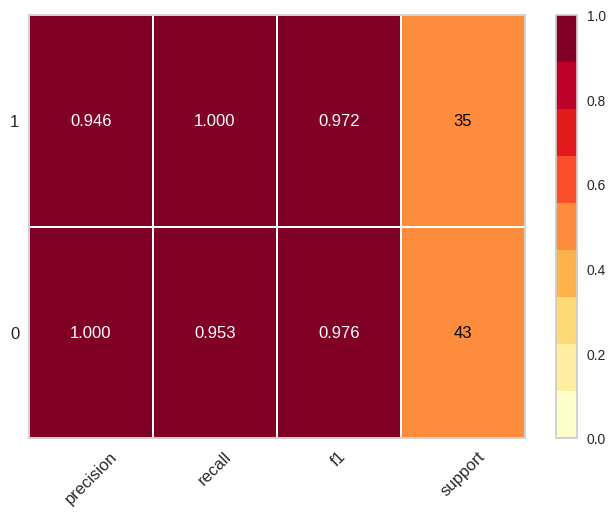

In [ ]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rf, classes=classes, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.show()

Text(0.5, 1.0, 'Predicted against Actual plot')

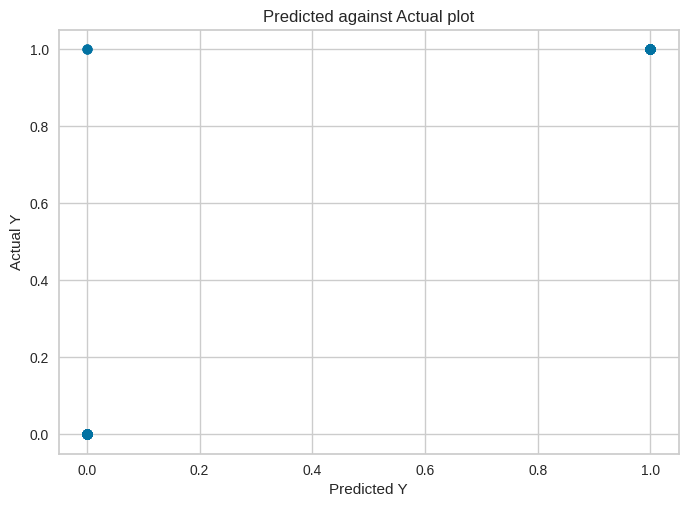

In [ ]:
plt.scatter(y_test,y_pred)
plt.xlabel("Predicted Y")
plt.ylabel("Actual Y")
plt.title("Predicted against Actual plot")

## Conclusion


---


Among the above classifiers `Random Forest Classifier` performs well on this dataset. It has higher values in terms of both Accuracy - 80% and F1 Score - 0.84(approximately)

<!-- The deployment of this model can be seen here - [LINK](https://dropout-predictor.herokuapp.com) -->

Epoch 1/97
49/49 [==============================] - 2s 13ms/step - loss: 0.7002 - accuracy: 0.4330 - val_loss: 0.6969 - val_accuracy: 0.5155
Epoch 2/97
49/49 [==============================] - 0s 7ms/step - loss: 0.6888 - accuracy: 0.5361 - val_loss: 0.6986 - val_accuracy: 0.4948
Epoch 3/97
49/49 [==============================] - 0s 7ms/step - loss: 0.6836 - accuracy: 0.5670 - val_loss: 0.7015 - val_accuracy: 0.5258
Epoch 4/97
49/49 [==============================] - 0s 6ms/step - loss: 0.6796 - accuracy: 0.5361 - val_loss: 0.7071 - val_accuracy: 0.5052
Epoch 5/97
49/49 [==============================] - 0s 5ms/step - loss: 0.6731 - accuracy: 0.5567 - val_loss: 0.7071 - val_accuracy: 0.5361
Epoch 6/97
49/49 [==============================] - 0s 4ms/step - loss: 0.6700 - accuracy: 0.5979 - val_loss: 0.7090 - val_accuracy: 0.5361
Epoch 7/97
49/49 [==============================] - 0s 5ms/step - loss: 0.6666 - accuracy: 0.5979 - val_loss: 0.7100 - val_accuracy: 0.5052
Epoch 8/97
49/49 [=

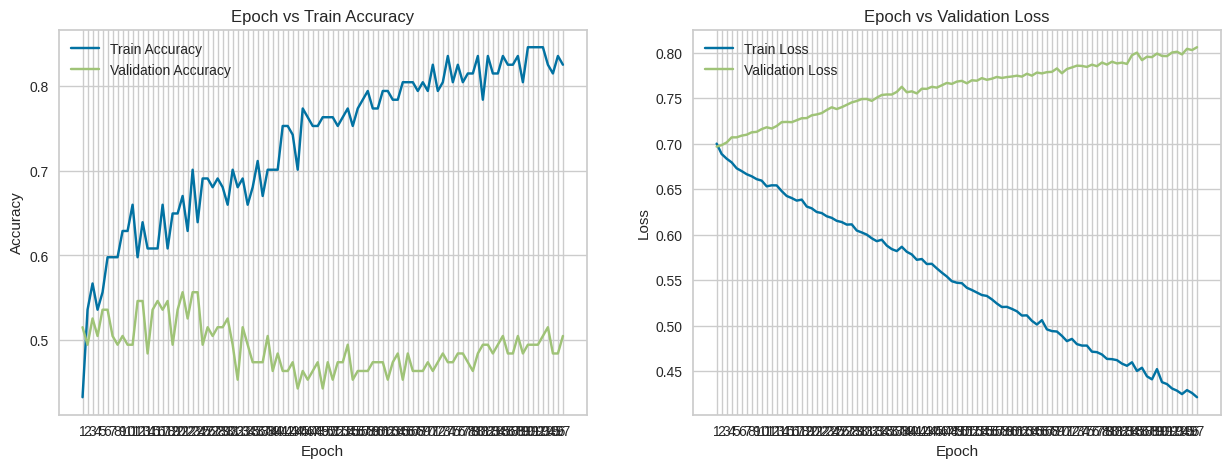

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt

# Generate some dummy data for demonstration
X = np.random.rand(194, 10)
y = np.random.randint(0, 2, size=(194,))

# Split the data into training and validation sets
X_train = X[:97]  # Use the first 97 samples for training
y_train = y[:97]
X_val = X[97:]    # Use the remaining samples for validation
y_val = y[97:]

# Define a simple neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model for 97 epochs with a batch size of 2 (change batch size as needed)
history = model.fit(X_train, y_train, epochs=97, batch_size=2, validation_data=(X_val, y_val))

# Assuming you have already trained your model and have test_x and test_y
test_x = np.random.rand(50, 10)  # Replace with your test data
test_y = np.random.randint(0, 2, size=(50,))  # Replace with your test labels

# Predict using the trained model
y_pred = model.predict(test_x)

# Convert probability predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
threshold = 0.5
y_pred_binary = np.where(y_pred > threshold, 1, 0)

# Calculate precision, recall, F1-score, and accuracy
precision = precision_score(test_y, y_pred_binary)
recall = recall_score(test_y, y_pred_binary)
f1 = f1_score(test_y, y_pred_binary)
accuracy = accuracy_score(test_y, y_pred_binary)

# Print the metrics
print("Precision: ", precision * 100)
print("Recall: ", recall * 100)
print("F1 Score: ", f1 * 100)
print("Accuracy: ", accuracy * 100)

# Plot training and validation accuracy and loss
ep = 97  # Number of epochs
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot([str(i) for i in range(1, ep + 1)], history.history['accuracy'], label="Train Accuracy")
plt.plot([str(i) for i in range(1, ep + 1)], history.history['val_accuracy'], label="Validation Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch vs Train Accuracy")

plt.subplot(1, 2, 2)
plt.plot([str(i) for i in range(1, ep + 1)], history.history['loss'], label="Train Loss")
plt.plot([str(i) for i in range(1, ep + 1)], history.history['val_loss'], label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Validation Loss")

plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, accuracy_score, f1_score
import pandas as pd

# Assuming X_train, y_train, X_test, y_test are your image data and labels

# Define the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, channels)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test)
y_pred = tf.argmax(y_pred_probs, axis=1).numpy()

print(classification_report(y_test, y_pred))
# print('{}\'s Accuracy: {}'.format(type(model).__name__, accuracy_score(y_test, y_pred)))
print('{}\'s F1_Score: {}'.format(type(model).__name__, f1_score(y_test, y_pred)))

# Update the scores dataframe
scores_df = scores_df.append(pd.DataFrame({'Model':[type(model).__name__],
                                           'F1_score':[f1_score(y_test, y_pred)],
                                           'Accuracy':[accuracy_score(y_test, y_pred)]
                                          }), ignore_index=True)


NameError: ignored